# spaCy's Pipelines
In this notebook, we will be learning about the various pipelines in spaCy. As we have seen, spaCy offers both heuristic (rules-based) and machine learning natural language processing solutions. These solutions are activated by pipes. In this notebook, you will learn about pipes and pipelines generally and the ones offered by spaCy specifically.


In [1]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Standard Pipeline
SpaCy is much more than an NLP framework. It is also a way of designing and implementing complex pipelines. A pipeline is a sequence of pipes, or actors on data, that make alterations to the data or extract information from it. In some cases, later pipes require the output from earlier pipes. In other cases, a pipe can exist entirely on its own. An example can be see in the image below.

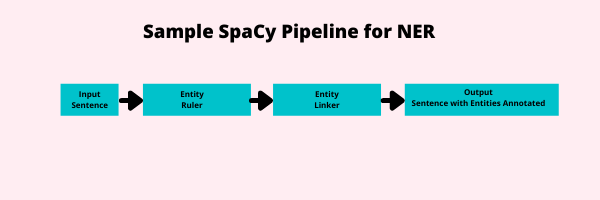

Here, we see an input, in this case a sentence, enter the pipeline from the left. Two pipes are activated on this, a rules-based named entity recognizer known as an EntityRuler which finds entities and an EntityLinker pipe that identifies what entity that is to perform toponym resolution. The sentence is then outputted with the sentence and the entities annotated. At this point, we could use the doc.ents feature to find the entities in our sentence. In spaCy, you will often use pipelines that are more sophisticated than this. You will specifically use a Tok2Vec input layer to vectorize your input sentence. This will allow machine learning pipes to make predictions.

Below is a complete list of the AttributeRuler pipes available to you from spaCy and the Matchers.

### Attribute Rulers

- Dependency Parser
- EntityLinker
- EntityRecognizer
- EntityRuler
- Lemmatizer
- Morpholog
- SentenceRecognizer
- Sentencizer
- SpanCategorizer
- Tagger
- TextCategorizer
- Tok2Vec
- Tokenizer
- TrainablePipe
- Transformer

### Matchers
- DependencyMatcher
- Matcher
- PhraseMatcher

# How to Add Pipes

In most cases, you will use an off-the-shelf spaCy model. In some cases, however, an off-the-shelf model will not fill your needs or will perform a specific task very slowly. A good example of this is sentence tokenization. Imagine if you had a document that was around 1 million sentences long. Even if you used the small English model, your model would take a long time to process those 1 million sentences and separate them. In this instance, you would want to make a blank English model and simply add the Sentencizer to it. The reason is because each pipe in a pipeline will be activated (unless specified) and that means that each pipe from Dependency Parser to named entity recognition will be performed on your data. This is a serious waste of computational resources and time. The small model may take hours to achieve this task. By creating a blank model and simply adding a Sentencizer to it, you can reduce this time to merely minutes.

In [2]:
nlp = spacy.blank("en")

Here, notice that we have used spacy.blank, rather than spacy.load. When we create a blank model, we simply pass the two letter combination for a language, in this case, en for English. Now, let’s use the add_pipe() command to add a new pipe to it. We will simply add a sentencizer.

In [3]:
nlp.add_pipe("sentencizer")

In [4]:
import requests
from bs4 import BeautifulSoup

s = requests.get("https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")
soup = BeautifulSoup(s.content).text.replace("-\n", "").replace("\n", " ")
nlp.max_length = 5278439

In [7]:
soup[:100]

'This is the 100th Etext file presented by Project Gutenberg, and is presented in cooperation with Wo'

In [8]:
%%time
doc = nlp(soup)
len(list(doc.sents))

CPU times: user 12.1 s, sys: 210 ms, total: 12.3 s
Wall time: 12.8 s


94134

with the `sm`:

```python
%%time
nlp2 = spacy.load("en_core_web_sm")
nlp2.max_length = 5278439

doc = nlp2(soup)
print (len(list(doc.sents)))

>> 112074
>> Wall time: 49min 15s
```

The difference in time here is remarkable. Our text string was around 5.2 million characters. The blank model with just the Sentencizer completed its task in 7.54 seconds and found around 94k sentences. The small English model, the most efficient one offered by spaCy, did the same task in 46 minutes and 15 seconds and found around 112k sentences. The small English model, in other words, took approximately 380 times longer.

# Examining a Pipeline

In spaCy, we have a few different ways to study a pipeline. If we want to do this in a script, we can do the following command:

In [9]:
nlp.analyze_pipes()

{'summary': {'sentencizer': {'assigns': ['token.is_sent_start', 'doc.sents'],
   'requires': [],
   'scores': ['sents_f', 'sents_p', 'sents_r'],
   'retokenizes': False}},
 'problems': {'sentencizer': []},
 'attrs': {'doc.sents': {'assigns': ['sentencizer'], 'requires': []},
  'token.is_sent_start': {'assigns': ['sentencizer'], 'requires': []}}}

Note the dictionary structure. This tells us not only what is inside the pipeline, but its order. Each key after “summary” is a pipe. The value is a dictionary. This dictionary tells us a few different things. All of these value dictionaries state: “assigns” which corresponds to a value of what that particular pipe assigns to the token and doc as it passes through the pipeline. In some cases, there will be a key of “scores” in the dictionary. This indicates how the machine learning model was evaluated. We will learn more about model evaluation in our machine learning section below.